In [1]:
import yfinance as yf
import pandas as pd
import quandl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
job = pd.read_csv('../Pandas/STP-20220317102940796.csv', encoding='latin1', sep=';')

In [3]:
job

,Data,24369 - Taxa de desocupação - PNADC - %,24371 - Empregados no setor privado e público - PNADC - Unidades (mil),24372 - Empregados no setor público - PNADC - Unidades (mil),24373 - Empregado por conta própria - PNADC - Unidades (mil),24375 - Empregados no setor privado - Com carteira - PNADC - Unidades (mil),24376 - Empregados no setor privado - Sem Carteira - PNADC - Unidades (mil),24377 - Empregados no setor privado - Total - PNADC - Unidades (mil)
0,03/2012,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,04/2012,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,05/2012,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,06/2012,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,07/2012,"7,5",63.523,11.119,19.843,35.120,11.293,46.413
...,...,...,...,...,...,...,...,...
114,09/2021,"12,6",61.724,11.168,25.461,33.508,11.691,45.199
115,10/2021,"12,1",62.497,11.152,25.638,33.876,11.956,45.832
116,11/2021,"11,6",63.287,11.275,25.841,34.224,12.179,46.403
117,12/2021,"11,1",64.010,11.375,25.944,34.495,12.443,46.938


In [16]:
job.drop(118,inplace=True)

In [13]:
c = job.columns.to_list()
job.rename(columns={
    c[1]: 'Desocupacao',
    c[2]: 'Empregado priv e pub',
    c[3]: 'Empregado publico',
    c[4]: 'Empregado proprio',
    c[5]: 'Empregado privado carteira',
    c[6]: 'Empregado privado s carteira',
    c[7]: 'Total' 
}, inplace=True)

In [17]:
job

,Data,Desocupacao,Empregado priv e pub,Empregado publico,Empregado proprio,Empregado privado carteira,Empregado privado s carteira,Total
0,03/2012,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,04/2012,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,05/2012,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,06/2012,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,07/2012,"7,5",63.523,11.119,19.843,35.120,11.293,46.413
...,...,...,...,...,...,...,...,...
113,08/2021,"13,1",60.760,11.230,25.253,32.894,11.342,44.236
114,09/2021,"12,6",61.724,11.168,25.461,33.508,11.691,45.199
115,10/2021,"12,1",62.497,11.152,25.638,33.876,11.956,45.832
116,11/2021,"11,6",63.287,11.275,25.841,34.224,12.179,46.403


In [18]:
job.Data = pd.to_datetime(job.Data, format='%m/%Y')

In [19]:
job

,Data,Desocupacao,Empregado priv e pub,Empregado publico,Empregado proprio,Empregado privado carteira,Empregado privado s carteira,Total
0,2012-03-01,"8,0",62.105,10.767,20.174,34.262,11.122,45.384
1,2012-04-01,"7,8",62.586,10.884,20.205,34.574,11.180,45.754
2,2012-05-01,"7,7",62.927,10.925,20.165,34.759,11.244,46.003
3,2012-06-01,"7,6",63.299,11.031,19.930,35.004,11.265,46.269
4,2012-07-01,"7,5",63.523,11.119,19.843,35.120,11.293,46.413
...,...,...,...,...,...,...,...,...
113,2021-08-01,"13,1",60.760,11.230,25.253,32.894,11.342,44.236
114,2021-09-01,"12,6",61.724,11.168,25.461,33.508,11.691,45.199
115,2021-10-01,"12,1",62.497,11.152,25.638,33.876,11.956,45.832
116,2021-11-01,"11,6",63.287,11.275,25.841,34.224,12.179,46.403


In [21]:
job.Desocupacao = job.Desocupacao.str.replace(',','.').astype(float)

In [26]:
for i in job.columns.to_list()[2:]:
    job[i] = job[i].str.replace('.','').astype(int)

/tmp/ipykernel_26155/102134413.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  job[i] = job[i].str.replace('.','').astype(int)


In [27]:
job

,Data,Desocupacao,Empregado priv e pub,Empregado publico,Empregado proprio,Empregado privado carteira,Empregado privado s carteira,Total
0,2012-03-01,8.0,62105,10767,20174,34262,11122,45384
1,2012-04-01,7.8,62586,10884,20205,34574,11180,45754
2,2012-05-01,7.7,62927,10925,20165,34759,11244,46003
3,2012-06-01,7.6,63299,11031,19930,35004,11265,46269
4,2012-07-01,7.5,63523,11119,19843,35120,11293,46413
...,...,...,...,...,...,...,...,...
113,2021-08-01,13.1,60760,11230,25253,32894,11342,44236
114,2021-09-01,12.6,61724,11168,25461,33508,11691,45199
115,2021-10-01,12.1,62497,11152,25638,33876,11956,45832
116,2021-11-01,11.6,63287,11275,25841,34224,12179,46403


In [28]:
job.set_index('Data', inplace=True)

In [29]:
job

,Desocupacao,Empregado priv e pub,Empregado publico,Empregado proprio,Empregado privado carteira,Empregado privado s carteira,Total
Data,,,,,,,
2012-03-01,8.0,62105,10767,20174,34262,11122,45384
2012-04-01,7.8,62586,10884,20205,34574,11180,45754
2012-05-01,7.7,62927,10925,20165,34759,11244,46003
2012-06-01,7.6,63299,11031,19930,35004,11265,46269
2012-07-01,7.5,63523,11119,19843,35120,11293,46413
...,...,...,...,...,...,...,...
2021-08-01,13.1,60760,11230,25253,32894,11342,44236
2021-09-01,12.6,61724,11168,25461,33508,11691,45199
2021-10-01,12.1,62497,11152,25638,33876,11956,45832


<AxesSubplot:xlabel='Data'>

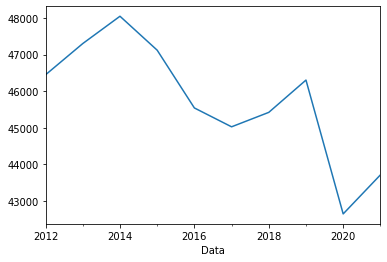

In [31]:
job.Total.resample('Y').mean().plot()

<AxesSubplot:xlabel='Data'>

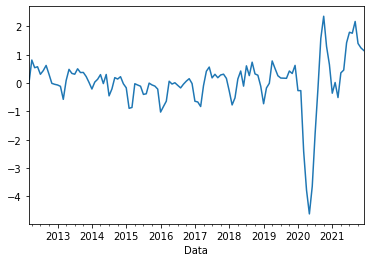

In [32]:
(job.Total.pct_change().fillna(0)*100).plot() #variacao em porcentagem

<AxesSubplot:xlabel='Data'>

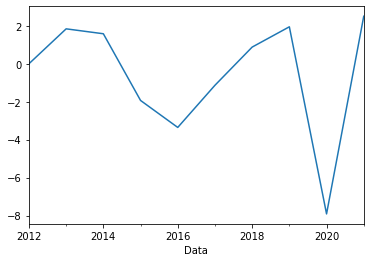

In [36]:
(job.Total.resample('Y').mean().pct_change().fillna(0)*100).plot()

In [37]:
sum([1,2,3,4])

10

In [38]:
# map percorre item a item e aplica a funcao
job.Desocupacao.map(np.log10)

Data
2012-03-01    0.903090
2012-04-01    0.892095
2012-05-01    0.886491
2012-06-01    0.880814
2012-07-01    0.875061
                ...   
2021-08-01    1.117271
2021-09-01    1.100371
2021-10-01    1.082785
2021-11-01    1.064458
2021-12-01    1.045323
Name: Desocupacao, Length: 118, dtype: float64

In [39]:
job

,Desocupacao,Empregado priv e pub,Empregado publico,Empregado proprio,Empregado privado carteira,Empregado privado s carteira,Total
Data,,,,,,,
2012-03-01,8.0,62105,10767,20174,34262,11122,45384
2012-04-01,7.8,62586,10884,20205,34574,11180,45754
2012-05-01,7.7,62927,10925,20165,34759,11244,46003
2012-06-01,7.6,63299,11031,19930,35004,11265,46269
2012-07-01,7.5,63523,11119,19843,35120,11293,46413
...,...,...,...,...,...,...,...
2021-08-01,13.1,60760,11230,25253,32894,11342,44236
2021-09-01,12.6,61724,11168,25461,33508,11691,45199
2021-10-01,12.1,62497,11152,25638,33876,11956,45832


In [40]:
np.random.seed(10)
# quantidade de observações
n = 100

escolaridade = ['Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

cidades = ['São Paulo', 'Recife', 'Salvador', 'Salvador', 'Rio de Janeiro']

sexo = ['Masculino', 'Feminino']


# dicionário com dados
data = {
    'Id': np.arange(1, n+1),
    'Idade': np.random.randint(18, 70, size = n),
    'Renda': np.random.randint(1_500, 10_000, size = n),
    'Sexo': np.random.choice(sexo, size = n),
    'Escolaridade': np.random.choice(escolaridade, size = n),
    'Cidade': np.random.choice(cidades, size = n)
}

df = pd.DataFrame(data)

In [41]:
df.Sexo.map({
    'Feminino':'ppk',
    'Masculino': 'piru'
})

0     piru
1      ppk
2      ppk
3      ppk
4      ppk
      ... 
95    piru
96    piru
97    piru
98     ppk
99    piru
Name: Sexo, Length: 100, dtype: object

In [42]:
def velho(idade):
    if idade > 50:
        return 'velho'
    return 'adulto'

In [43]:
df.Idade.map(velho)

0     adulto
1      velho
2     adulto
3     adulto
4      velho
       ...  
95     velho
96    adulto
97     velho
98     velho
99     velho
Name: Idade, Length: 100, dtype: object

In [44]:
# aply aplica funcao na linha ou coluna
df.Renda.describe()

count     100.000000
mean     5885.120000
std      2328.749998
min      1912.000000
25%      3858.500000
50%      5944.500000
75%      7961.250000
max      9978.000000
Name: Renda, dtype: float64

In [45]:
def pobre(money):
    if money > 6000:
        return 'rico'
    return 'pobre'

In [46]:
df.Renda.apply(pobre)

0     pobre
1      rico
2      rico
3     pobre
4     pobre
      ...  
95    pobre
96    pobre
97     rico
98    pobre
99    pobre
Name: Renda, Length: 100, dtype: object

In [47]:
df.Idade.apply(lambda x: x + 10)

0     37
1     64
2     43
3     28
4     77
      ..
95    77
96    43
97    72
98    68
99    70
Name: Idade, Length: 100, dtype: int64

In [48]:
df.Idade

0     27
1     54
2     33
3     18
4     67
      ..
95    67
96    33
97    62
98    58
99    60
Name: Idade, Length: 100, dtype: int64